# Park Data Set

## What makes for the best neighborhood for a dog?
Parks! The more parks the better. Dogs love being able to play outside and go on walks. The best neighborhood for a dog would have lots of parks.

In [1]:
# Importing pandas libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("parks.csv")

In [3]:
data.head(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


The data above is straight from the csv file and unfiltered. 
To better analyze the data, we only want to look at "Parks" and not "Traffic Island/Median" and other items in the data file. Traffic Islands/Medians are not as exciting for dogs. It is all about the parks. The metric for the "bestness" of a neighborhood is the number of Parks a neighborhood has, so we can disregard the data about the Traffic Medians.

In [4]:
park_mask = data["type"]== "Park"
parks = data[park_mask]

In [5]:
parks.head(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
9,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247
10,1928748922,Arlington Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418283,-79.975050


In [6]:
parks["neighborhood"].value_counts()

Beechview            6
South Side Slopes    6
Hazelwood            5
Mount Washington     5
Troy Hill            5
                    ..
Arlington            1
Middle Hill          1
West Oakland         1
Bluff                1
Bon Air              1
Name: neighborhood, Length: 71, dtype: int64

In [ ]:
parks["neighborhood"].value_counts().head(15).plot(kind='bar', figsize=(15,5))

## Bar Chart
The bar chart shows the spread of how many parks are in each neighborhood very well. You can see that the two neighborhoods with the most parks are Beechview and South Side Slopes, both having 6 parks. Based on the metric for being the "best" neighborhood being the quantity of parks, Beechview and South Side Slopes are the two best neighborhoods.

## Map of Parks Per Neighborhood

In [8]:
import pandas as pd
import geopandas
%matplotlib inline

In [9]:
parks["neighborhood"].value_counts().sort_values()

Bon Air                1
East Carnegie          1
Polish Hill            1
Squirrel Hill North    1
Point Breeze           1
                      ..
Troy Hill              5
Mount Washington       5
Hazelwood              5
South Side Slopes      6
Beechview              6
Name: neighborhood, Length: 71, dtype: int64

In [10]:
num_parks = parks["neighborhood"].value_counts()
num_parks

Beechview            6
South Side Slopes    6
Hazelwood            5
Mount Washington     5
Troy Hill            5
                    ..
Arlington            1
Middle Hill          1
West Oakland         1
Bluff                1
Bon Air              1
Name: neighborhood, Length: 71, dtype: int64

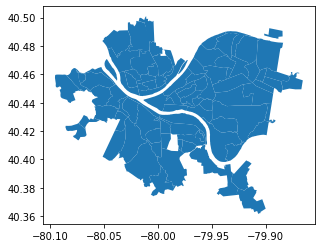

In [11]:
neighborhoods = geopandas.read_file("Neighborhood/Neighborhoods_.shp")
neighborhoods.plot()

In [12]:
df = pd.DataFrame(parks)
df.head(3)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017


In [43]:
data = pd.DataFrame(num_parks)
data["values"] = data["neighborhood"]
data["neighborhood"] = data.index
data = data.reset_index(drop=True)
data

,neighborhood,values
0,Beechview,6
1,South Side Slopes,6
2,Hazelwood,5
3,Mount Washington,5
4,Troy Hill,5
...,...,...
66,Arlington,1
67,Middle Hill,1
68,West Oakland,1
69,Bluff,1


In [45]:
parks_map = neighborhoods.merge(data, how='left', left_on='hood', right_on='neighborhood')
parks_map[['hood','values','geometry']].head(10)

,hood,values,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,3.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,3.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,2.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,NaN,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


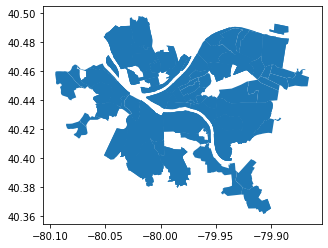

In [17]:
parks_map.plot(column='type')

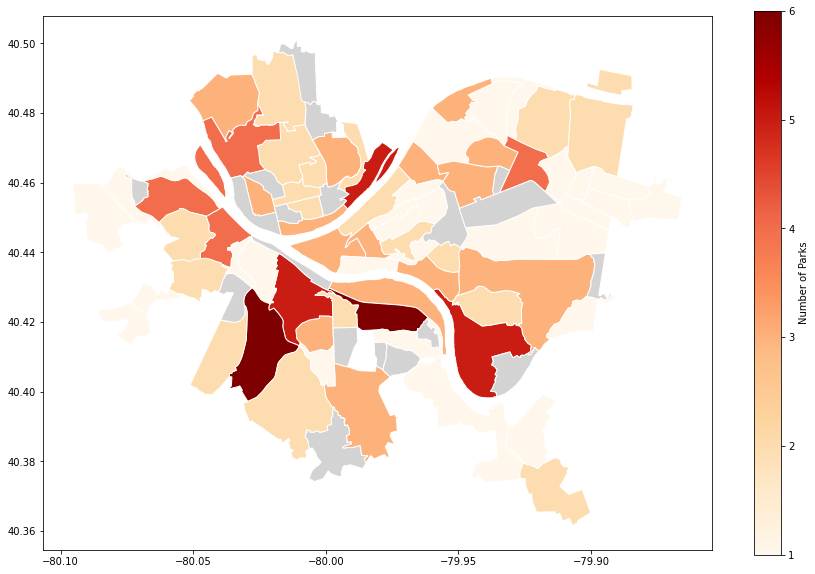

In [47]:
parks_map.plot(column='values', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## The Best Neighborhood Is...
